Objective : This goal is to construct a model that will assist students in narrowing down universities based on their profiles. The anticipated results offer students a good picture of their chances at a university.

* Features: 

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. SOP : Statement of Purpose ( out of 5 )
5. LOR : Letter of Recommendation Strength ( out of 5 )
6. CGPA ( out of 10 )
7. Research : Research Experience ( either 0 or 1 )
8. Chance of Admit ( ranging from 0 to 1 )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Projects/DataSets/Admission_Predict.csv')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data=data.drop('Serial No.',axis=1)

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
data.shape

(500, 8)

In [7]:
data.size

4000

In [8]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

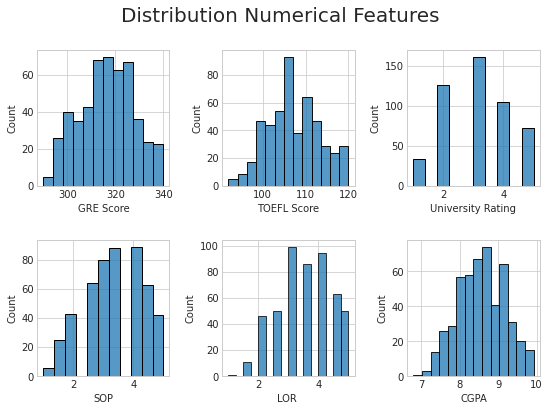

In [9]:
with plt.style.context('seaborn-whitegrid'):
    fig, axes = plt.subplots(2, 3, figsize=(9, 6))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    axes = axes.ravel()
    for ax, f in zip(axes, data):
        sns.histplot(data=data, x=f, ax=ax)
    fig.suptitle('Distribution Numerical Features', fontsize=20)

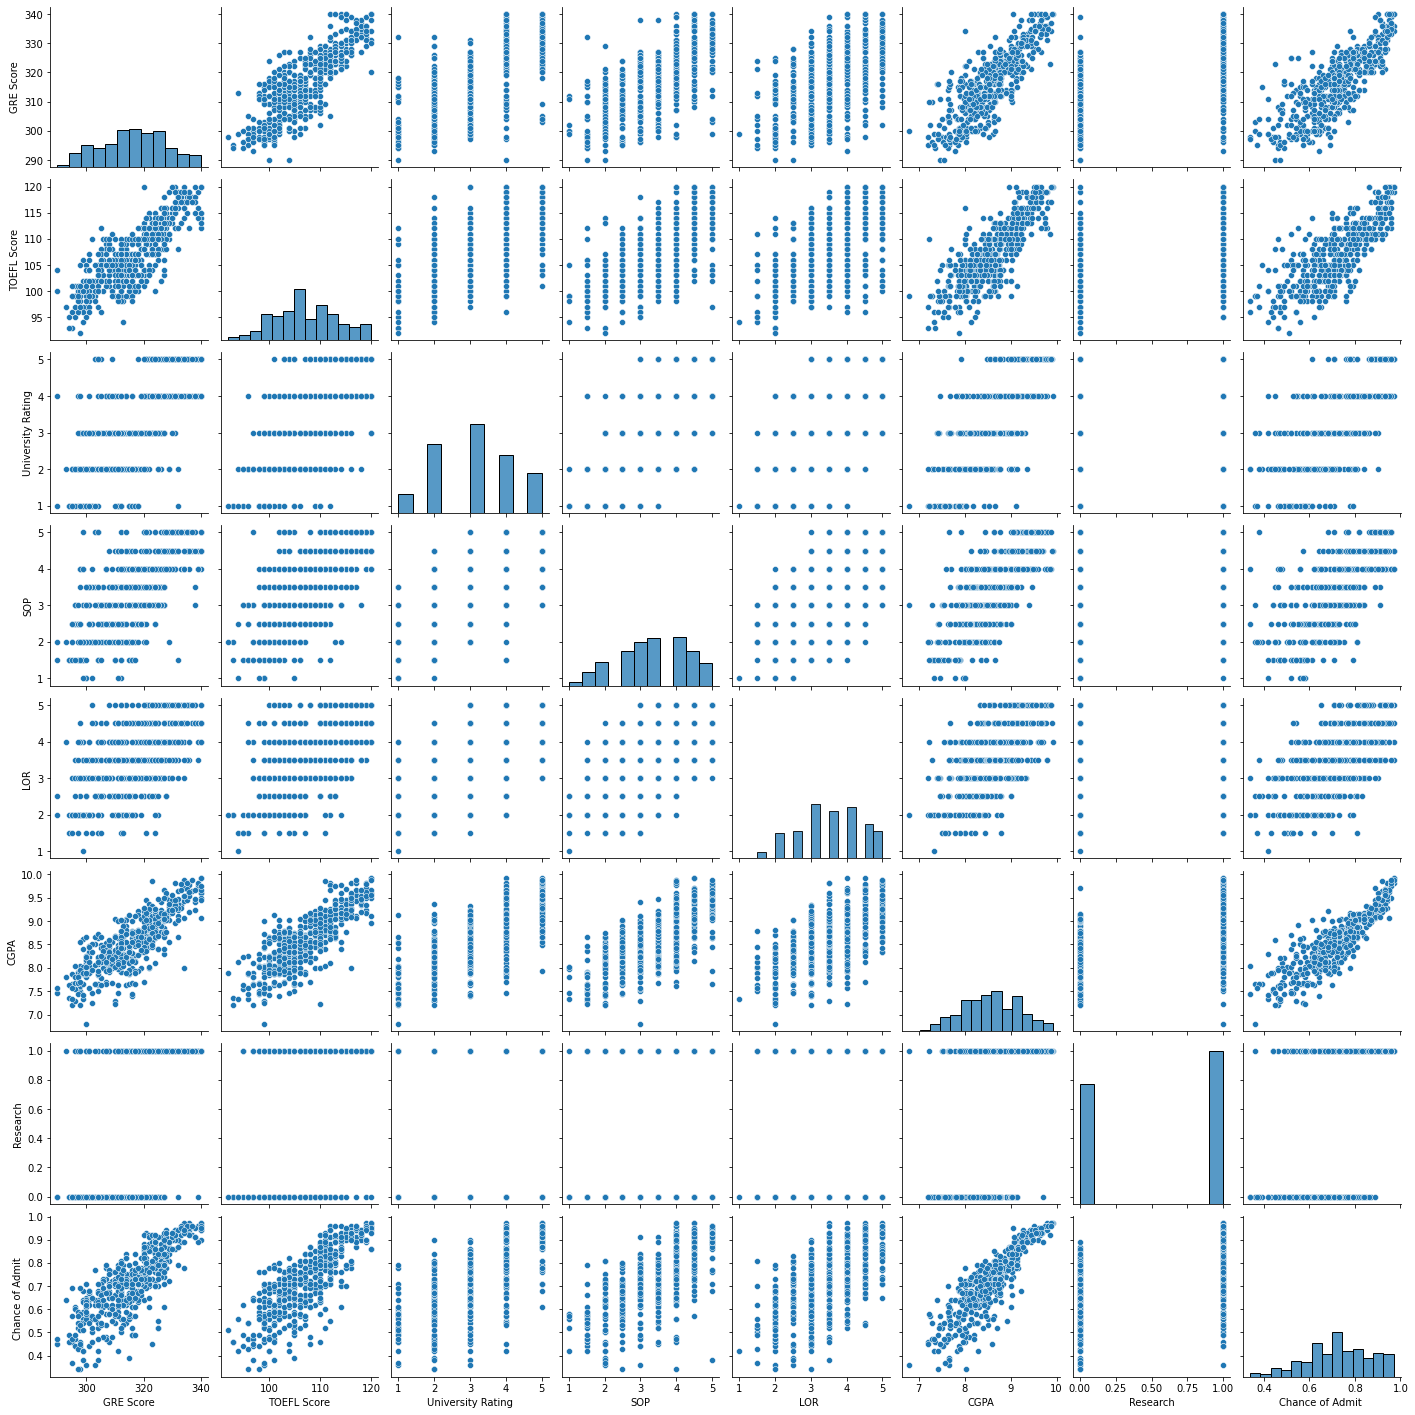

In [10]:
sns.pairplot(data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

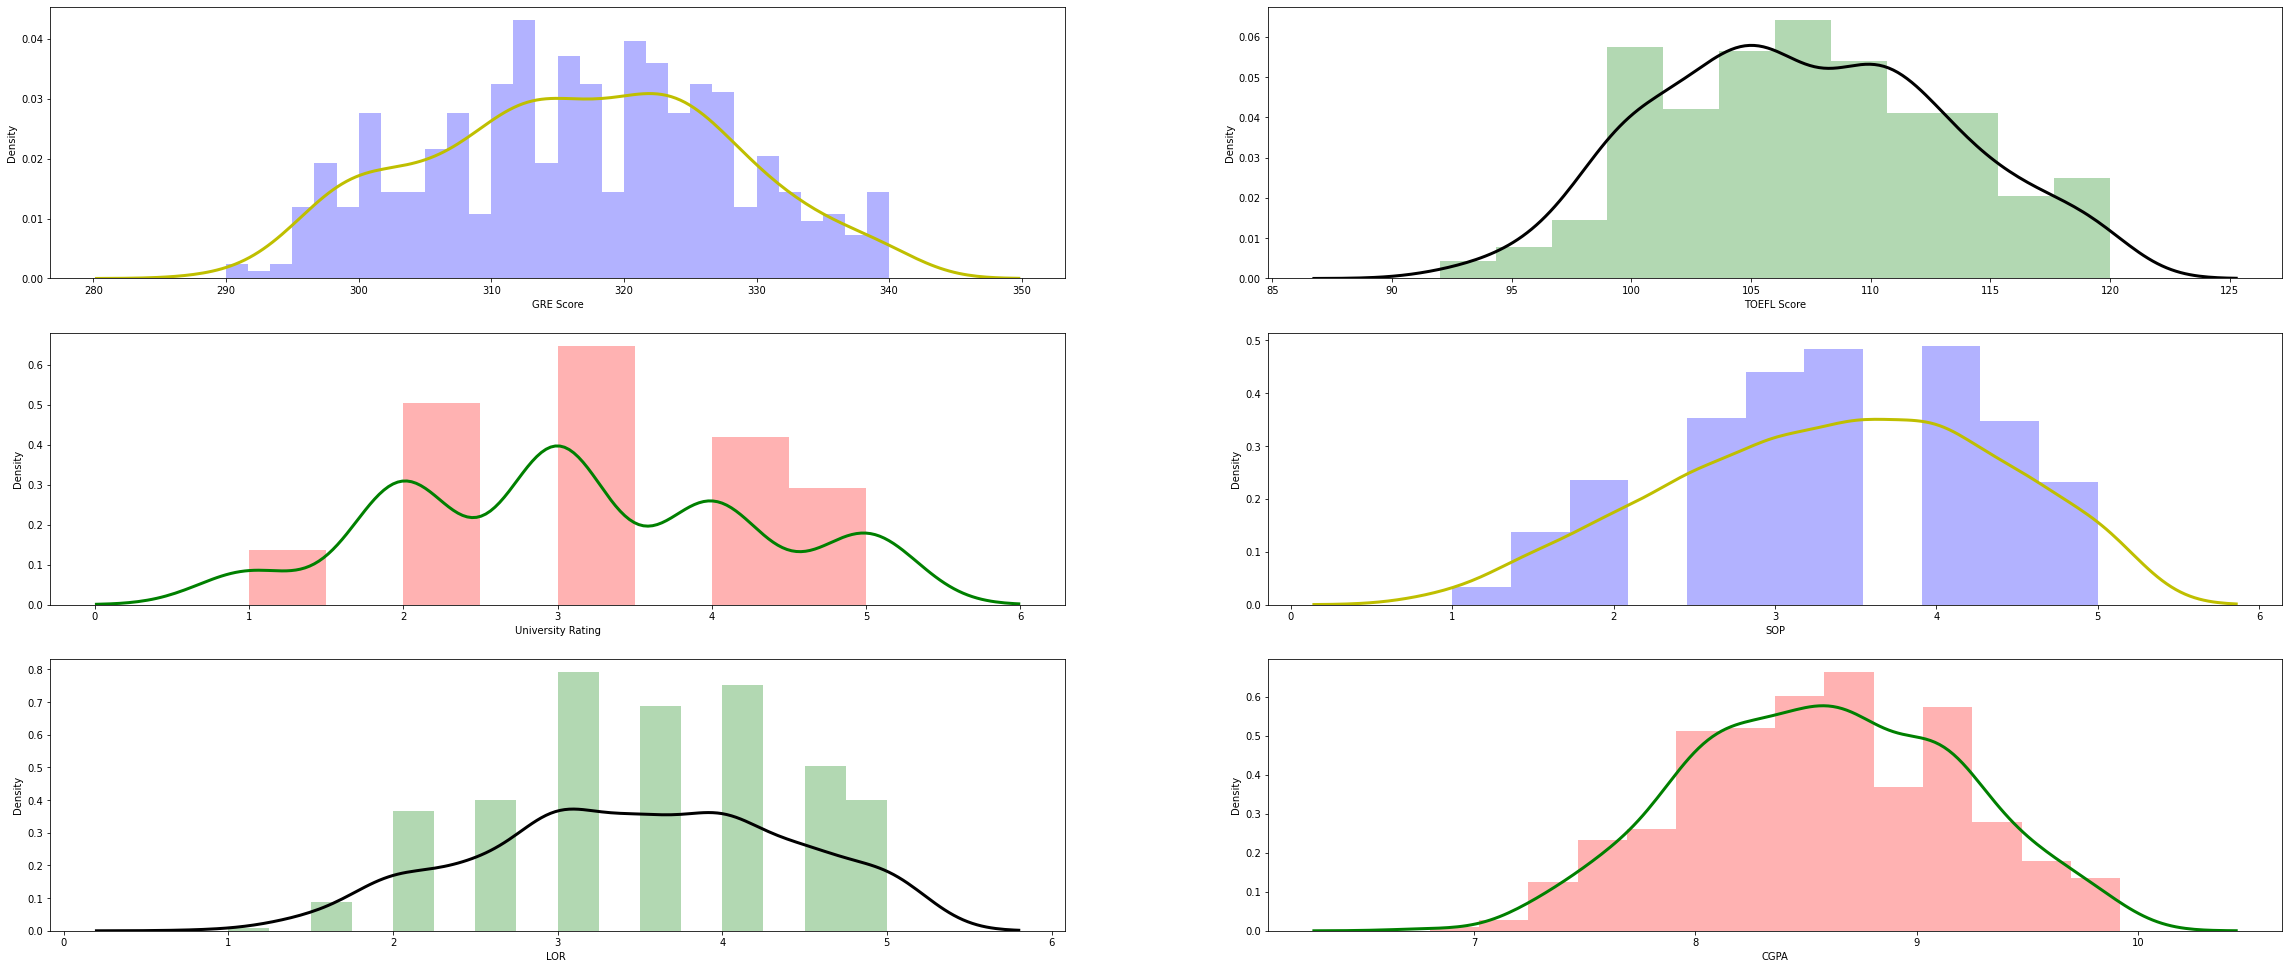

In [11]:
plt.figure(figsize=(40,35))
plt.subplot(6, 2, 1)
sns.distplot(data['GRE Score'],bins=30,color='Blue',  kde_kws={"color": "y", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 2,"alpha": 0.3 })
plt.subplot(6, 2, 2)
sns.distplot(data['TOEFL Score'],bins=12,color='Green' ,kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 7,"alpha": 0.3 })
plt.subplot(6, 2, 3)
sns.distplot(data['University Rating'],color='Red' ,kde_kws={"color": "g", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 7,"alpha": 0.3 })
plt.subplot(6, 2, 4)
sns.distplot(data['SOP'],color='Blue',  kde_kws={"color": "y", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 2,"alpha": 0.3 })
plt.subplot(6, 2, 5)
sns.distplot(data['LOR '],color='Green' ,kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 7,"alpha": 0.3 })
plt.subplot(6, 2, 6)
sns.distplot(data['CGPA'],color='Red' ,kde_kws={"color": "g", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 7,"alpha": 0.3 })

In [12]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


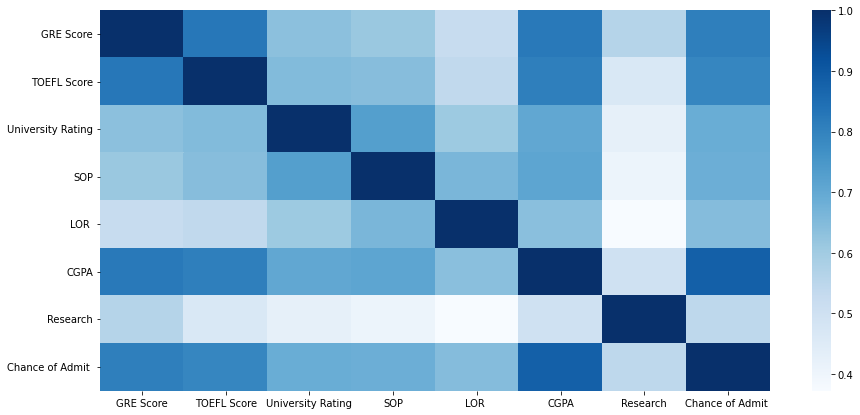

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),cmap='Blues')



* All features share significant correlation with each other. Each attribute is imp for predicting right probability



In [14]:
data.corr()['Chance of Admit ']

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


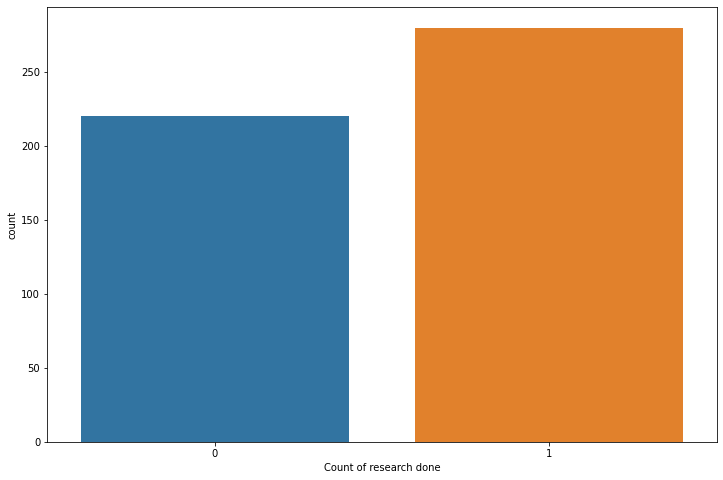

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(data['Research'])
plt.xlabel('Research')
plt.xlabel('Count of research done')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


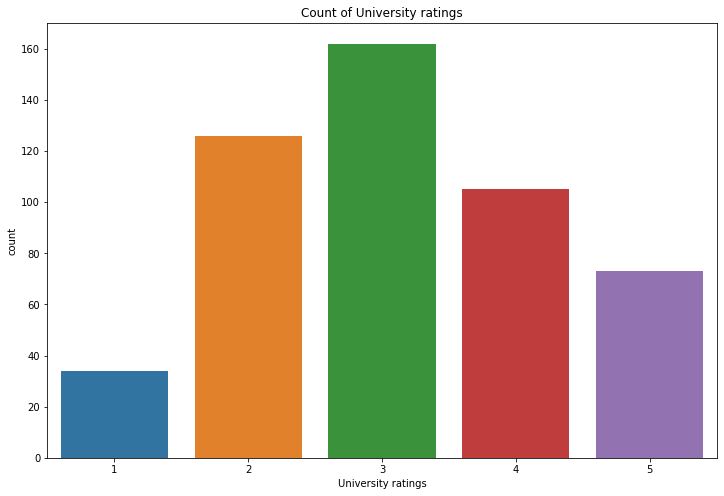

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data['University Rating'])
plt.xlabel('University ratings')
plt.title('Count of University ratings')
plt.show()

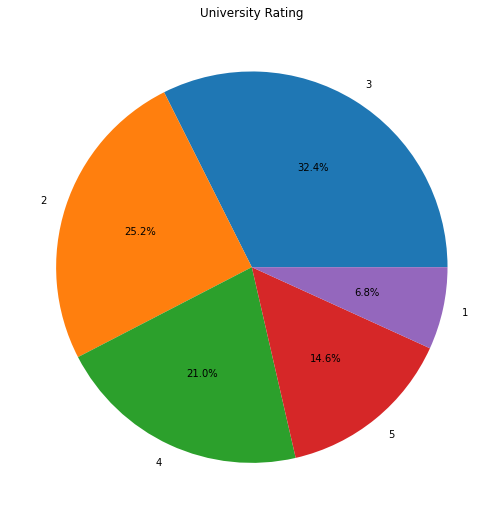

In [17]:
plt.figure(figsize=(10,9))
plt.pie(data['University Rating'].value_counts().values,labels=data['University Rating'].value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.show()

In [18]:
data.groupby('University Rating')[['SOP','LOR ','CGPA', 'GRE Score', 'TOEFL Score']].mean()

,SOP,LOR,CGPA,GRE Score,TOEFL Score
University Rating,,,,,
1,1.941176,2.426471,7.798529,304.911765,100.205882
2,2.682540,2.956349,8.177778,309.134921,103.444444
3,3.308642,3.401235,8.500123,315.030864,106.314815
4,4.000000,3.947619,8.936667,323.304762,110.961905
5,4.479452,4.404110,9.278082,327.890411,113.438356


* Mean Value for all the features incrases with increase in University Ranking

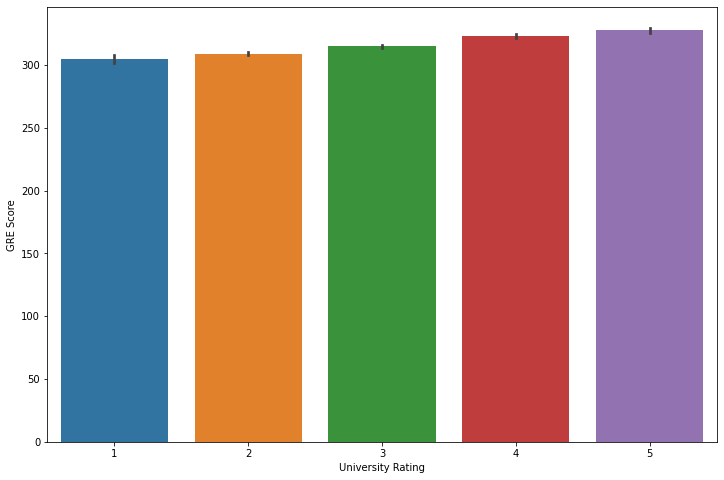

In [19]:
#relation between Gre and University
plt.figure(figsize=(12,8))
sns.barplot(x='University Rating',y='GRE Score',data=data)
plt.show()

* University with 5 star rating require higher scores in GRE

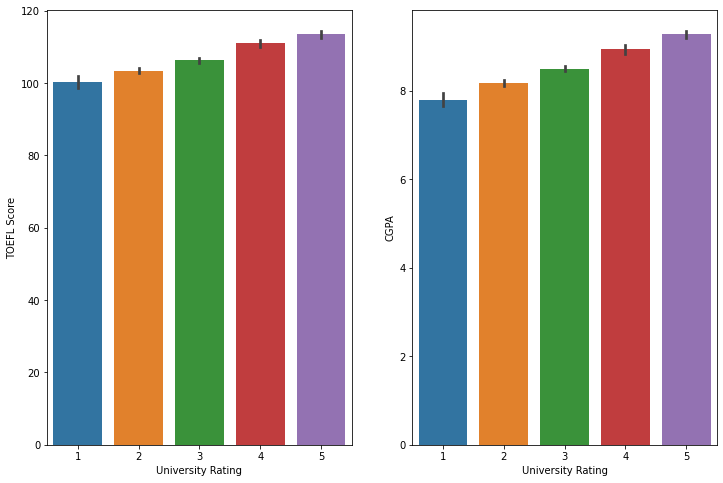

In [20]:
plt.subplots(figsize=(12,8))

plt.subplot(1,2,1)
sns.barplot(x='University Rating',y='TOEFL Score',data=data)

plt.subplot(1,2,2)
sns.barplot(x='University Rating',y='CGPA',data=data)

plt.show()

* Students who performed excellent in TOEFL and Graduation will get University 5

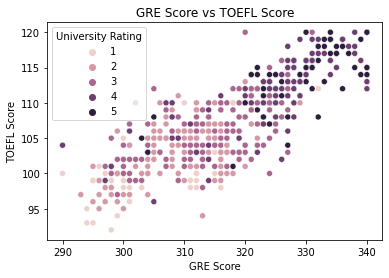

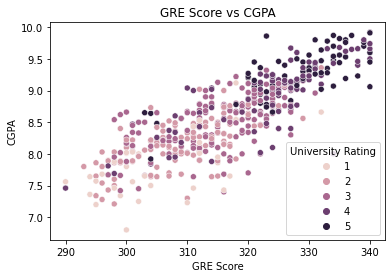

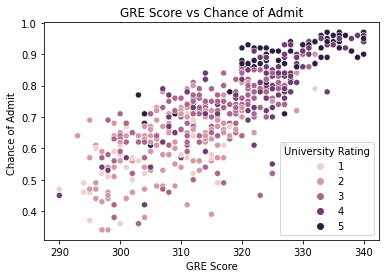

In [21]:

fig = sns.scatterplot(x="GRE Score", y="TOEFL Score",hue="University Rating",data= data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

fig = sns.scatterplot(x="GRE Score", y="CGPA",hue="University Rating", data= data)
plt.title("GRE Score vs CGPA")
plt.show()

fig = sns.scatterplot(x="GRE Score", y="Chance of Admit ", hue="University Rating", data= data)
plt.title("GRE Score vs Chance of Admit")
plt.show()

* Chance Of Admission in top university increase as increase in Scores

In [22]:
df=data[data['Chance of Admit ']>0.9]

In [23]:
df.shape

(61, 8)

* 61/500 people have 90% chances to get addmission

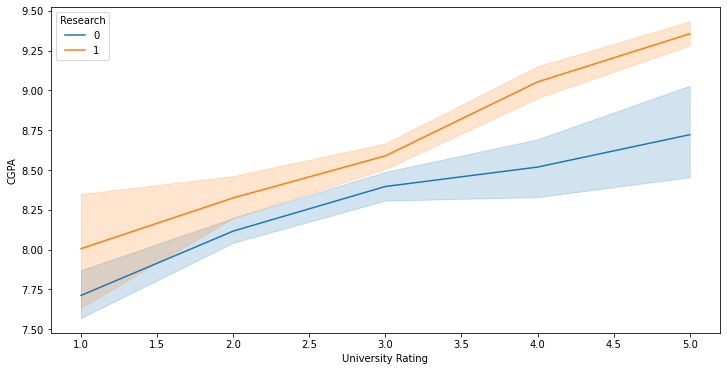

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(y="CGPA", x="University Rating",hue="Research",data=data)
plt.show()

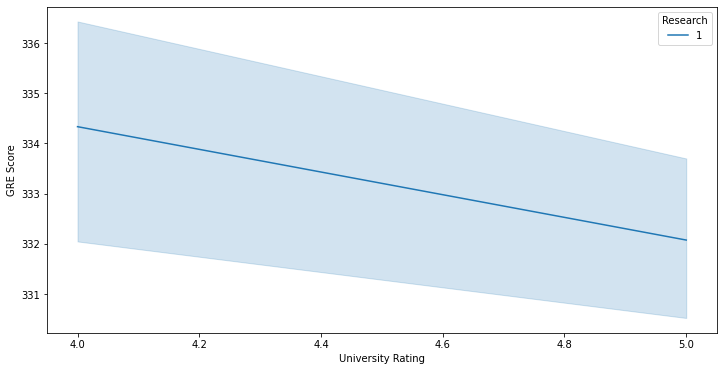

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(y="GRE Score", x="University Rating",hue="Research",data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


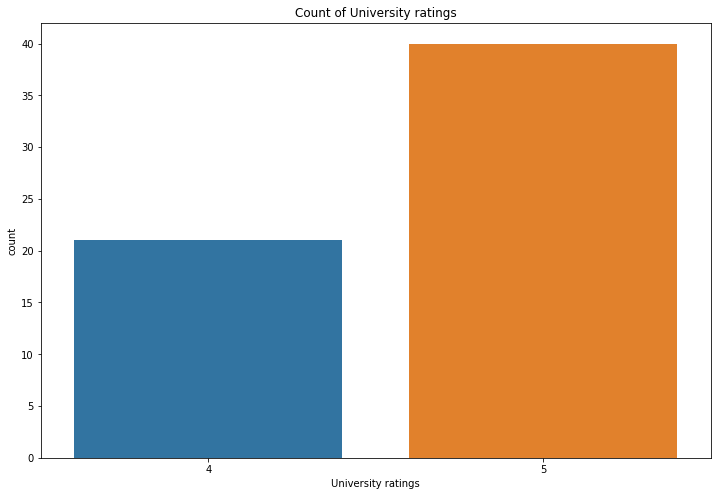

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(df['University Rating'])
plt.xlabel('University ratings')
plt.title('Count of University ratings')
plt.show()

* Students with 90% chances will get University with rating 4 and 5 

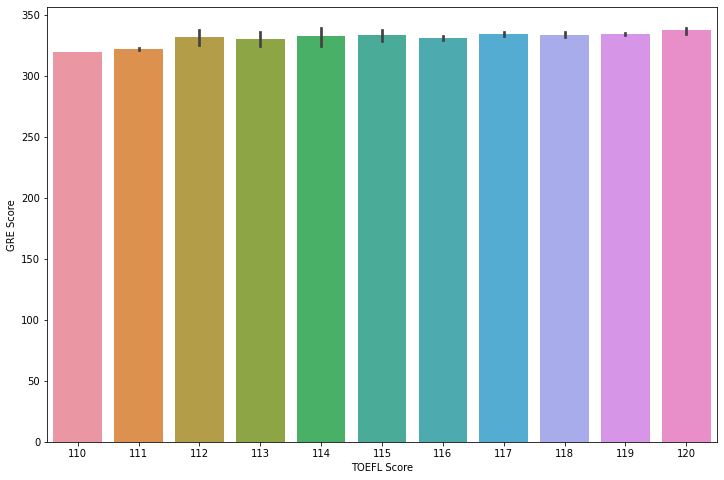

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='TOEFL Score',y='GRE Score',data=df)
plt.show()

* Student with 90% chance have GRE higher than 300 and tOEFL higher than 110

## MODEL BUILDING

In [28]:
X=data.drop('Chance of Admit ',axis=1)
y=data['Chance of Admit ']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor




from sklearn.metrics import accuracy_score,mean_squared_error

In [32]:
regressors=[['Linear Regression :',LinearRegression()],
            ['K-Neighbors Regression :',KNeighborsRegressor()],
            ['Support Vector Regression :',SVR()],
            ['Decision Tree Regression :',DecisionTreeRegressor()],
            ['Random Forest Regression :',RandomForestRegressor()],
            ['Xgboost: ', XGBRegressor()],
            ['Gradient Boosting Regression :', GradientBoostingRegressor()],
            ['Ada Boosting Regression :',AdaBoostRegressor()]]

print("Model Accuracy : ")

r_pred =[]
for name,model in regressors:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    r_pred.append(np.sqrt(mean_squared_error(y_test, predictions)))

Model Accuracy : 
Linear Regression : 0.0620765214897221
K-Neighbors Regression : 0.08072736008731284
Support Vector Regression : 0.08776343346810923
Decision Tree Regression : 0.08620131476182173
Random Forest Regression : 0.06322472775742094
[06:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost:  0.06150917358914763
Gradient Boosting Regression : 0.06311637159736848
Ada Boosting Regression : 0.0709649497403415


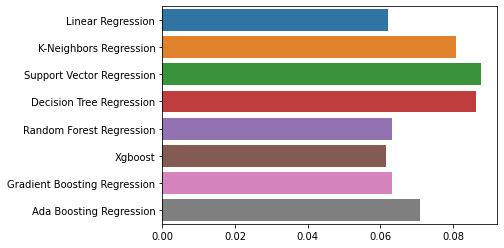

In [33]:
y_ax=['Linear Regression', 'K-Neighbors Regression', 'Support Vector Regression','Decision Tree Regression', 'Random Forest Regression','Xgboost', 'Gradient Boosting Regression', 'Ada Boosting Regression' ]
x_ax=r_pred
sns.barplot(x=x_ax,y=y_ax)

### OPTIMAL MODEL 

* Since, Support Vector is giving the best accuracy. SVR is the selected model

In [34]:
svr_model=SVR()
svr_model.fit(X_train, y_train)
SVR_predictions = svr_model.predict(X_test)


## Prediction

In [35]:
def pred(GREScore,TOEFLScore,UniversityRating,SOP,LOR ,CGPA,Research):
  print(f"Your parameters are-:\nGre score:{GREScore}\nToefl score:{TOEFLScore}\nUniversity rating:{UniversityRating}\nStatement of purpose Score:{SOP}\nLetter of Recommendation score:{LOR}\nCGPA:{CGPA}\nResearch Experience:{Research}")

  user_input=np.array([GREScore,TOEFLScore,UniversityRating,SOP,LOR ,CGPA,Research])

  result=svr_model.predict([user_input])[0]*100

  return ("Your chances of getting into College are:",result)


In [ ]:
pred(339,110,4,4,4,9,1)

Your parameters are-:
Gre score:339
Toefl score:110
University rating:4
Statement of purpose Score:4
Letter of Recommendation score:4
CGPA:9
Research Experience:1


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


('Your chances of getting into College are:', 86.15006062375505)